# Example of simulating the frequency effect in visual word recognition with the model BRAID

## Introduction
The purpose of this notebook file is to illustrate how to run a simulation (not only with one stimulus) of a task with a list of stimuli. We took, for instance, a list of 1000 word stimuli to process using BRAID.
For each stimuli, two task are simulated: the **word recognition task** (What word is the stimuli?) and a **lexical decision task** (Is the stimulus a word or a nonword?)

In order to simulate those tasks, the model is used to compute the probability distribution corresponding to these tasks. Simulating each task consists of choosing a variable of interest (let us name it $X^T$), and computing the conditional probability distribution $P(X^T~|~\textit{input})$. The term "$\textit{input}$" gathers the stimulus identity, gaze postion and visual attention parameters (respectively, $S^{1:T}_{1:N},~G^{1:T},~\mu_A^{1:T}$ and $\sigma_A^{1:T}$). In word recognition, the computed distribution is $P(W^T~|~S^{1:T}_{1:N}~G^{1:T}~\mu_A^{1:T}~\sigma_A^{1:T})$ whereas in lexical decision, it is $P(D^T~|~S^{1:T}_{1:N}~G^{1:T}~\mu_A^{1:T}~\sigma_A^{1:T})$.

The BRAID model is programmed so that word and lexical decision distributions (among others related to letter perception and reading) are computed in each iteration. The modeller choose the stimulus, the number of iteration, the parameter of the simulation and the distributions he want to retrieve at the end.
We note that in the following example, the gaze position and visual attention focus depends on the stimulus length and coincide.  Mathematically, they are set such as $\forall t, G^t = \mu_A^t = \frac{N+1}{2}+ 1$ with $N$ the stimulus length (number of letters). Moreover, the default standard deviation of the attention distribution is set to $\forall t, \sigma_A^t = 1.75$.

This document is composed of three sections. In the first section, we describe how the simulations are executed.
In the second section, we show how the data are aggregated and the response times of the model are calculated.
In the third and last section, we show the results of the simulations through a statistical analysis and graphical figures.

## I. Simulation configuration
### 1. Loading libraries, initializing BRAID

First, we load the needed libraries and we add the path to the projet folder to correctly load the `braidpy` files. 

In [1]:
# General purpose
import sys, os
sys.path.append("../")
# Model
from braidpy.simu import simu
# data manipulation
import pandas as pd
import numpy as np
# graphics
import matplotlib.pyplot as plt
import seaborn as sns
# data saving and loading
import pickle as pkl

Here, we declare (define) a helper fucntion that will allow us to save the simulation results.  

In [2]:
def pkl_save(data, file_path):
    """helper to open file and save python datastructure"""
    filehandler = open(file_path,"wb")
    pkl.dump(data,filehandler)
    filehandler.close()
    return

We declare a simulation context and we specify the lexicon and some model parameters such as the confusion matrix for letters. 

In [3]:
sim = simu( max_iter = 1000,  
            stim = "stimulus",  
            langue = "fr",
            lexicon_name = "lexique3_red.csv",  
            conf_mat_name = "Simpson13Mod.xls",  
            ortho_char_name = "alphabet_lat.csv",
            phono_char_name = "xsampa_fr.csv",
            enable_phono = False,  
            store_phono = True,  
            store_ortho = True,  
            model = None,  
            use_pkl = False,  
            save_pkl = False,
            build_prototype = False
            )
model = sim.model

### 2.Sampling an pseudo-arbitrary list of 1000 words
For our simulation, we sample a list of 1000 word from the french lexicon (the same lexicon used by the model to build its orthographic knowledge). The word list is sampled then saved.
It is only loaded in the following code. The commented block show how it is sampled.
We note that we rejected from this list words with very low frequency (<.1) and we have restricted the list only to words of length between 4 and 9.

In [4]:
#stim_df = lex.query('freq>.1').query('3<len<10').sample(n=1000)
#stim_df.to_csv("stimuli_dataframe_1000.csv")

stim_df = pd.read_csv("stimuli_dataframe_1000.csv")

Here we plot distribution (histograms) of length and log-frequency of the stimuli.

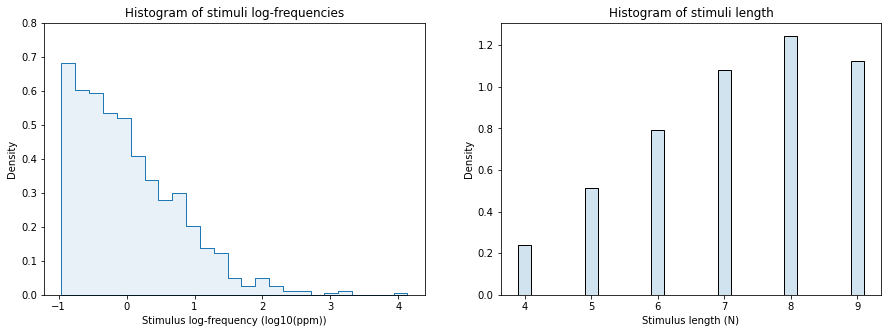

In [5]:
stim_df["freq_log"] = np.log10(stim_df["freq"])

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=stim_df , x="freq_log", alpha = .1,element="step", stat="density")
plt.ylim(0,.8)
plt.title("Histogram of stimuli log-frequencies"); plt.xlabel("Stimulus log-frequency (log10(ppm))");

plt.subplot(122)
plot = sns.histplot(data=stim_df , x="len", alpha = .2,  
                    bins=np.arange(4 - 0.1, 9+ 0.2, 0.2), stat="density")
plt.title("Histogram of stimuli length"); plt.xlabel("Stimulus length (N)");

### 3. Running simulation
The following lines consist of a for loop over the list of stimuli.
In each step, we set the stimulus, specify the gaze and attention parameters  then the simulation is run using `run_simu_normal` method. The targeted distribution are saved in the result folder `output/`.
These lines are commented since the simulation are already run and saved in the output folder.

In [6]:
list_item = stim_df.word
lex = sim.model.lexicon.reset_index()
"""
for w in list_item :
    sim.stim = w
    model.gazePosition = (len(w)+1)/2
    model.meanA = (len(w)+1)/2
    model.sdA = 1.75
    model.Qa = 1
    model.top_down_influence = True
    sim.store={"percept":True, "word":True, "ld":True, "TDI":True}
    sim.run_simu_normal()
    idxs = lex.loc[lex.word==w].idx.values
    pkl_save(sim.get_res(dist="ld", mod="ortho", stim=w), "output/ld/wrd_"+w+"_ld.pkl")
    pkl_save(sim.get_res(dist="word", mod="ortho", stim=w)[idxs[0]], "output/wr/wrd_"+w+"_wr.pkl")
    sim.remove_stim_res()
"""

'\nfor w in list_item :\n    sim.stim = w\n    model.gazePosition = (len(w)+1)/2\n    model.meanA = (len(w)+1)/2\n    model.sdA = 1.75\n    model.Qa = 1\n    model.top_down_influence = True\n    sim.store={"percept":True, "word":True, "ld":True, "TDI":True}\n    sim.run_simu_normal()\n    idxs = lex.loc[lex.word==w].idx.values\n    pkl_save(sim.get_res(dist="ld", mod="ortho", stim=w), "output/ld/wrd_"+w+"_ld.pkl")\n    pkl_save(sim.get_res(dist="word", mod="ortho", stim=w)[idxs[0]], "output/wr/wrd_"+w+"_wr.pkl")\n    sim.remove_stim_res()\n'

## II. Post-processing
### 1. Loading simulation results

Simulation results were saved in the folder `output/`. Each file in the subfolder `wr/` and `ld/` corresponds to a single stimulus response.
In the following lines of code, we load an data array from each file and for each task and stack them all in one "big" matrix.
We obtain two "big" matrices: `wr_res` for word recogntion results and `ld_res` for lexical decision results. 
These two matrices are saved and in the following lines of code, we only load them. To see how they are constructed, please check the commented block.

In [7]:
list_item = stim_df.word
"""
wr_res_list = []
ld_res_list = []
for w in list_item:
    wr_res_list.append(pkl.load(open("output/wr/wrd_"+w+"_wr.pkl", "rb")))
    ld_res_list.append(pkl.load(open("output/ld/wrd_"+w+"_ld.pkl", "rb"))[0])
    
wr_res = np.dstack(wr_res_list).squeeze()
ld_res = np.dstack(ld_res_list).squeeze()
"""
wr_res = np.load("output/wr_res.npy")
ld_res = np.load("output/ld_res.npy")

Using these matrices, we can plot the probability evolution curves for all stimuli and for the two tasks :

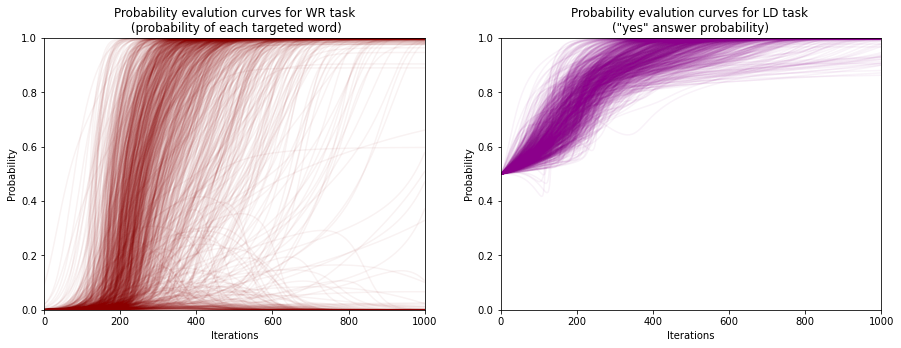

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title("Probability evalution curves for WR task\n (probability of each targeted word)")
plt.plot(np.arange(1001), wr_res[:,:], alpha=.05, color='darkred');
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel("Iterations"); plt.ylabel("Probability");

plt.subplot(122)
plt.title("Probability evalution curves for LD task \n(\"yes\" answer probability)");
plt.plot(np.arange(1001), ld_res[:,:], alpha=.05, color='darkmagenta')
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel("Iterations"); plt.ylabel("Probability");

### 2. Formatting results and post-processing 

The results are saved as data matrices (`numpy arrays`). Here, we format them as ("tidy") data table (`pandas dataframe`).
The data table contains 6 columns: `"item", "iteration", "wr_prob", "ld_prob", "Nlett"` and `"freq_log"`.


In [9]:
freq_item = [lex.loc[lex.word==x].freq.values[0] for x in list_item]

df = pd.DataFrame(columns=["item", "iteration", "wr_prob", "ld_prob", "Nlett", "freq_log"])
df["iteration"] = np.repeat(np.arange(1001), wr_res.shape[1])
df["item"] = np.tile(list_item, 1001)

df["wr_prob"] = wr_res.flatten(order = 'C')
df["ld_prob"] = ld_res.flatten(order = 'C')

df["Nlett"] = pd.Series(list(map(lambda x: len(x), np.tile(list_item, 1001))))
df["freq_log"] = np.log10(np.tile(freq_item, 1001))

The `df` table contains data about the probabilities in each iteration (*i.e.* the evolution over time of
probability values of the variable of interest). 
To get BRAID response times values, a straightforward decision model is considered: to obtain simulated RTs,
we compute the number of iterations needed for the probability value to reach a fixed decision threshold (task-specific).
The threshold is set equal to .5 for word recogntion task and to .9 for lexical decison task.

In [10]:
wr_restricted_df = df.query('.5<wr_prob').drop_duplicates(subset='item', keep='first').reset_index()
ld_restricted_df = df.query('.9<ld_prob').drop_duplicates(subset='item', keep='first').reset_index()

However, not all the probability curves reach a very high value (~1) at the end of the simulation. Either the answer is not correct (a wrong word is recognized in WR or an "No" answr in LD), either the curve stagnate at some intermediate value below the threshold. We consider all these cases as incorrect responses. A correct answer rate is then computed and only correct answer are considered in statistical analyses.

In [11]:
print("[Word Recogntion ] => Number of correct answers: " + str(wr_restricted_df.shape[0]/10) + "%")
print("[Lexical Decision] => Number of correct answers: " + str(ld_restricted_df.shape[0]/10) + "%")

[Word Recogntion ] => Number of correct answers: 87.5%
[Lexical Decision] => Number of correct answers: 99.6%


## III. Results
### 1. Graphical visualisation of the length effect and the frequency effect

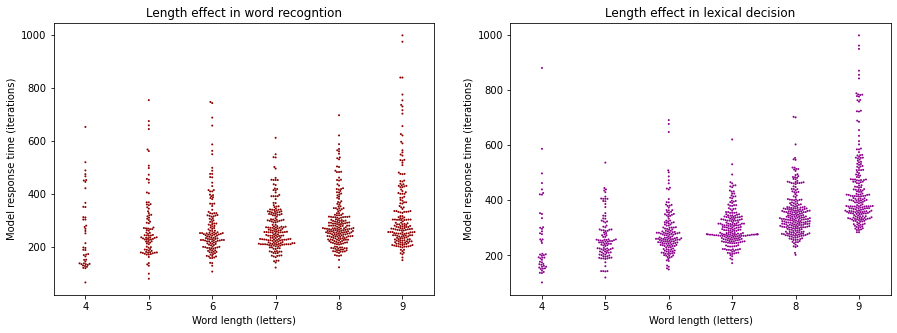

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.swarmplot(x = "Nlett", y = "iteration", color="darkred", size=2, data=wr_restricted_df)
plt.title("Length effect in word recogntion")
plt.ylabel("Model response time (iterations)"); plt.xlabel("Word length (letters)");


plt.subplot(122)
sns.swarmplot(x = "Nlett", y = "iteration", color="darkmagenta", size=2, data=ld_restricted_df)
plt.title("Length effect in lexical decision")
plt.ylabel("Model response time (iterations)"); plt.xlabel("Word length (letters)");

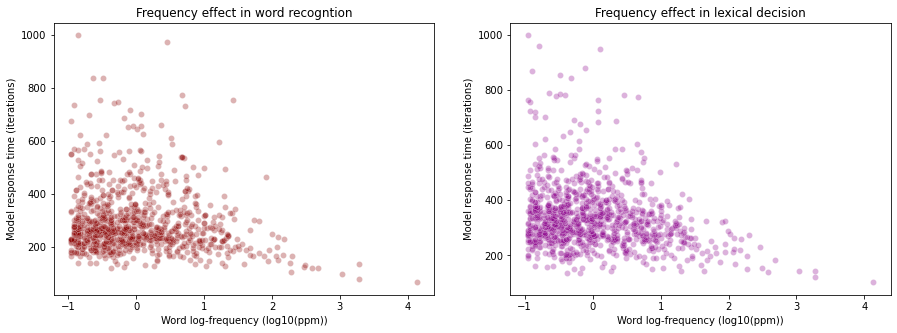

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.scatterplot(x = "freq_log", y = "iteration", color="darkred", alpha=.3, data=wr_restricted_df)
plt.title("Frequency effect in word recogntion")
plt.ylabel("Model response time (iterations)"); plt.xlabel("Word log-frequency (log10(ppm))");


plt.subplot(122)
sns.scatterplot(x = "freq_log", y = "iteration", color="darkmagenta", alpha=.3, data=ld_restricted_df)
plt.title("Frequency effect in lexical decision")
plt.ylabel("Model response time (iterations)"); plt.xlabel("Word log-frequency (log10(ppm))");

### 2. Statistical Analysis

In [14]:
import statsmodels.formula.api as sm

print("\t\t\t\t*********************\n\t\t\t\t** Word Recogntion **\n\t\t\t\t*********************\n")
print(sm.ols(formula="iteration ~ freq_log + Nlett", data=wr_restricted_df).fit().summary())

				*********************
				** Word Recogntion **
				*********************

                            OLS Regression Results                            
Dep. Variable:              iteration   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     16.16
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           1.28e-07
Time:                        13:33:45   Log-Likelihood:                -5414.2
No. Observations:                 875   AIC:                         1.083e+04
Df Residuals:                     872   BIC:                         1.085e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [15]:
print("\t\t\t\t***********************\n\t\t\t\t** Lexical Decision **\n\t\t\t\t***********************\n")
print(sm.ols(formula="iteration ~ freq_log + Nlett", data=ld_restricted_df).fit().summary())

				***********************
				** Lexical Decision **
				***********************

                            OLS Regression Results                            
Dep. Variable:              iteration   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           5.26e-67
Time:                        13:33:45   Log-Likelihood:                -5998.1
No. Observations:                 996   AIC:                         1.200e+04
Df Residuals:                     993   BIC:                         1.202e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------